# WA5FRF FFM Data Plots

In [22]:
# import required packages:
import urllib
import pandas as pd
import plotly.express as px
import wget
import os                                      # for making sure we have a directory to write data to
import data
import datetime
# Generate output directories:
if not os.path.exists('data'):
    os.makedirs('data')
if not os.path.exists('plots'):
    os.makedirs('plots')
    
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import numpy as np

import scipy as scp
from scipy import integrate

In [23]:
def fontoptions(fig):    # set consistent layout parameters
    fig.update_layout(
    font=dict(
#         family="Courier New, monospace",
        size=18,
# #         color="RebeccaPurple"
        )
    )

    # Eliminate the gray background plotly express uses by default:
    fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'
    })
    
    # Change grid color and axis colors
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='darkgray')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='darkgray')
    

## Import Digitized Spectrum Data

In [24]:
df = pd.read_csv('data/WA5FRF-FFM.csv')
df['Date']= datetime.datetime(2019, 10, 1, 0, 0, 0) + pd.to_timedelta(df['Time UTC'], 'hours')
df.drop(['Time UTC'], axis = 1)
# df[Time] = datetime.timedelta(hours=data['Time UTC'])

F1 = df[df['Mode']=='1F']
# F1.set_index('Date')
F2 = df[df['Mode']=='2F']
E = df[df['Mode']=='E']


In [25]:
# Set colors
color_1F = "#0000ff"
color_2F = "#F46C14"
color_E = "#0f0f0f"

color_Boulder = "#552DC9"
color_Austin = "#8DE6AE"

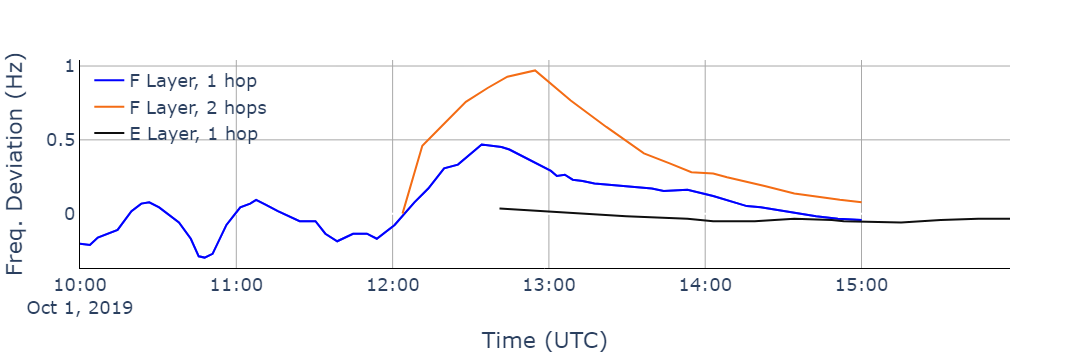

In [26]:
# fig = px.line(F1['Freq Hz'], F1['Date'])

# fig.add_line(px.line(F2['Freq Hz'], F2['Date']))
fig = px.line(x=F1['Date'], y=F1['Freq Hz'])
fig.add_scatter(x=F1['Date'], y=F1['Freq Hz'], mode = 'lines', line_color = color_1F, name = "F Layer, 1 hop")
fig.add_scatter(x=F2['Date'], y=F2['Freq Hz'], mode='lines', line_color = color_2F, name = "F Layer, 2 hops")
fig.add_scatter(x=E['Date'], y=E['Freq Hz'], mode='lines', line_color = color_E, name = "E Layer, 1 hop")

# fig.add_trace(px.line(F2['Freq Hz'], F2['Date']))

fontoptions(fig)

fig.update_layout(
    # title="Digitized Spectrogram",
    xaxis_title="Time (UTC)",
    yaxis_title='Freq. Deviation (Hz)',
    # legend_title="Trace"
)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))


fig.show()
fig.write_html("plots/"+ "Digitized spectrogram" + "_plot.html", include_plotlyjs="cdn")
# fig.write_image("plots/9b.png")
# F1

In [27]:
# TESTING
# import scipy as scp
# from scipy import integrate
# np.trapz(np.array(pathvel_2F))
# # pathvel_2F.cumsum()
# scp.integrate.cumtrapz(np.array(pathvel_2F))

In [28]:
c = 299792.458 # speed of light in km/s
f = 5e6 # Freq in Hz

def pathcalcs(df):
    pathvel = np.array(df['Freq Hz'] *(-c/f))
    # pathlen = scp.integrate.cumtrapz(pathvel_1F)
    
    delT=np.zeros(len(df['Time UTC']))                                 # preallocate
    pathInc = np.zeros(len(df['Time UTC']))                            # preallocate
    RelPathLen = np.zeros(len(df['Time UTC']))                         # preallocate
    for i in range(1, len(df['Time UTC'])):
        delT[i] = 3600*(pd.to_numeric(df['Time UTC'])[i] - pd.to_numeric(df['Time UTC'])[i-1] )             # time increment
        pathInc[i] = delT[i]*(pathvel[i-1]+pathvel[i])/2                                             # path increment
        RelPathLen[i] = pathInc[i] + RelPathLen[i-1]                                                 # cumulative sum of relative path length
    pathlen = RelPathLen
    print(delT)
    a = [pathvel,pathlen]
    return a

pathcalcs(F1)
    

[   0.     227.88   182.304  455.76   319.032  227.88   182.304  227.88
  455.76   273.456  182.304  136.728  182.304  319.032  182.304  136.728
  227.88   136.728  227.88   273.456  501.336  364.608  227.88   273.456
  364.608  319.032  227.88   410.184  455.76   319.032  364.608  319.032
  546.912  455.76   182.304  957.096  136.728  182.304  182.304  227.88
  273.456 1321.704  273.456  546.912  592.488  455.76   319.032  319.032
  911.52   364.608  501.336  546.912]


[array([ 1.22303331e-02,  1.27405799e-02,  9.67909930e-03,  6.61761872e-03,
        -1.03608273e-03, -4.09756332e-03, -4.60781008e-03, -2.56682303e-03,
         3.55613814e-03,  1.01893461e-02,  1.73328008e-02,  1.78430475e-02,
         1.63123072e-02,  4.57663166e-03,  4.94657556e-04, -2.56682303e-03,
        -4.09756332e-03, -5.62830361e-03, -3.58731655e-03, -1.03608273e-03,
         3.04589137e-03,  3.04589137e-03,  8.14835901e-03,  1.12098396e-02,
         8.14835901e-03,  8.14835901e-03,  1.01893461e-02,  4.57663166e-03,
        -4.60781008e-03, -1.02205245e-02, -1.83844727e-02, -1.99152130e-02,
        -2.80791612e-02, -2.70586677e-02, -2.60381741e-02, -1.73639792e-02,
        -1.53229921e-02, -1.58332389e-02, -1.37922518e-02, -1.32820051e-02,
        -1.22615115e-02, -1.02205245e-02, -9.20003095e-03, -9.71027771e-03,
        -7.15904390e-03, -4.60781008e-03, -3.07706979e-03, -2.56682303e-03,
        -1.55892078e-05,  1.00490432e-03,  2.02539785e-03,  2.53564461e-03]),
 array([  

[   0.     227.88   182.304  455.76   319.032  227.88   182.304  227.88
  455.76   273.456  182.304  136.728  182.304  319.032  182.304  136.728
  227.88   136.728  227.88   273.456  501.336  364.608  227.88   273.456
  364.608  319.032  227.88   410.184  455.76   319.032  364.608  319.032
  546.912  455.76   182.304  957.096  136.728  182.304  182.304  227.88
  273.456 1321.704  273.456  546.912  592.488  455.76   319.032  319.032
  911.52   364.608  501.336  546.912]
[   0.     227.88   227.88   455.76   546.912  501.336  455.76   638.064
  820.368  820.368  865.944  592.488  501.336  501.336  319.032  865.944
  683.64  1048.248  501.336    0.       0.       0.       0.       0.   ]
[   0.    2916.864 1412.856  592.488  957.096  911.52   865.944  273.456
 1321.704  911.52   865.944  729.216]


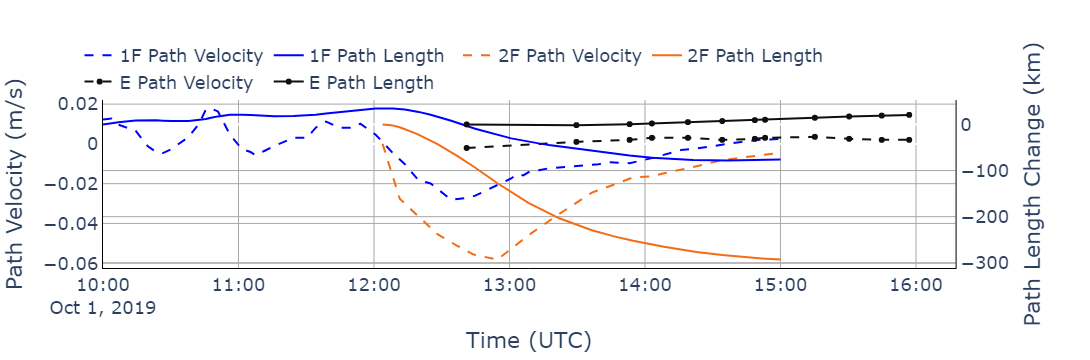

In [29]:
pathvel_1F, pathlen_1F = pathcalcs(F1)
pathvel_2F, pathlen_2F = pathcalcs(F2.reset_index())
pathvel_E, pathlen_E = pathcalcs(E.reset_index())

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=F1['Date'], y=pathvel_1F, name="1F Path Velocity", line={'dash': 'dash', 'color': color_1F}),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=F1['Date'], y=pathlen_1F, name="1F Path Length", line_color = color_1F),
    secondary_y=True,
)

# # Add figure title
# fig.update_layout(
#     title_text="Double Y Axis Example"
# )

# Set x-axis title
fig.update_xaxes(title_text="UTC Time")

# Set y-axes titles
fig.update_yaxes(title_text="Path Velocity (m/s)", secondary_y=False)
fig.update_yaxes(title_text="Path Length Change (km)", secondary_y=True)

#############################################################################################
# Let's repeat that for 2F...

# pathlen_2F = pathvel_2F.cumsum()
# pathlen_2F = np.trapz(pathvel_2F)

# Add traces
fig.add_trace(
    go.Scatter(x=F2['Date'], y=pathvel_2F, name="2F Path Velocity", line={'dash': 'dash', 'color': color_2F}),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=F2['Date'], y=pathlen_2F, name="2F Path Length", line_color = color_2F),
    secondary_y=True,
)

#############################################################################################
# And for E....

# Add traces
fig.add_trace(
    go.Scatter(x=E['Date'], y=pathvel_E, name="E Path Velocity", line={'dash': 'dash', 'color': color_E}),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=E['Date'], y=pathlen_E, name="E Path Length", line_color = color_E),
    secondary_y=True,
)
################################################################################################

fontoptions(fig)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    xanchor="right",
    x=.8
))

# Set x-axis title
fig.update_xaxes(title_text="Time (UTC)")

# Set y-axes titles
fig.update_yaxes(title_text="Path Velocity (m/s)", secondary_y=False)
fig.update_yaxes(title_text="Path Length Change (km)", secondary_y=True)


fig.show()
fig.write_html("plots/"+ "PathVel" + "_plot.html", include_plotlyjs="cdn")
# fig.write_image("plots/9c.png")

## Read Ionosonde Data
This data was obtained using the notebook at https://github.com/KCollins/didbase-fetch.

In [30]:
hmF2 = pd.read_csv('data/FFM-hmF2.csv')
hmF2 = hmF2.dropna()
hmF2 = hmF2.sort_index()   # should ensure datapoints are sorted in time
hmF1 = pd.read_csv('data/FFM-hmF1.csv')
hmF1 = hmF1.sort_index()
hmE = pd.read_csv('data/FFM-hmE.csv')
idx = hmE['Time'] > str(datetime.datetime(2019, 10, 1, 13, 35, 5))
hmE = hmE[idx] # Filter to ignore stand-in values for hmE

Overplot ionosonde data with the relative path length changes we identified: 

In [31]:
# Define a function to get height change from N hops, path length, h0:
def deltaheight(N=1, X = 1350, h0 =300, pathlen = 2):
    P0 = 2*N* np.sqrt((X/(2*N))**2 + h0**2) 
    path_total = P0 + pathlen # B
    # deltaheight = (np.sqrt(path_total**2 - (X**2))/(2*N) - h0)
    # total_height = np.sqrt((path_total/(2*N))**2 - (X/(2*N))**2)
    total_height = (0.5*N) * np.sqrt(path_total**2 - X**2)
    deltaheight = total_height - h0
    print('Change in Height:' + str(deltaheight))
    return deltaheight

deltaheight()
    

Change in Height:2.4538455207163565


2.4538455207163565

In [32]:
# TESTING



In [33]:
# def heightvec(pathlen_vec, N=1, X = 1350, h0 =278):
#     heightvec = pathlen_vec
#     for idx, pathlen in enumerate(pathlen_vec):
#         heightvec[idx] = h0 
#         print('h0 =====' + str(h0))
#         print('pathlen =====' + str(pathlen))
#         h0=deltaheight(N=N, X = X, h0 =h0, pathlen = pathlen)
#     return heightvec
    

Change in Height:[-1.70530257e-13  3.48584986e+00  5.96919085e+00  1.04397626e+01
  1.15036750e+01  1.08050572e+01  9.85523653e+00  8.87420804e+00
  9.14501435e+00  1.13949773e+01  1.43776147e+01  1.72150106e+01
  2.08578738e+01  2.47197347e+01  2.52525350e+01  2.50893308e+01
  2.42133799e+01  2.34447911e+01  2.22279787e+01  2.14936138e+01
  2.20789813e+01  2.33663057e+01  2.48396734e+01  2.78799776e+01
  3.18986043e+01  3.48339029e+01  3.71782360e+01  4.05531667e+01
  4.05452800e+01  3.79115016e+01  3.20460040e+01  2.50662646e+01
  9.64244229e+00 -5.74352670e+00 -1.18526795e+01 -3.94371830e+01
 -4.25560516e+01 -4.65680739e+01 -5.04353040e+01 -5.49186128e+01
 -6.00835409e+01 -8.32702596e+01 -8.76534220e+01 -9.64352912e+01
 -1.05265551e+02 -1.10159221e+02 -1.12435777e+02 -1.14124184e+02
 -1.16353203e+02 -1.16010001e+02 -1.14571037e+02 -1.12230545e+02]
Change in Height:[-3.41060513e-13 -6.11392697e+00  2.30725746e+00  7.78505567e+00
  1.76251582e+01  2.48339155e+01  3.06567640e+01  3.283

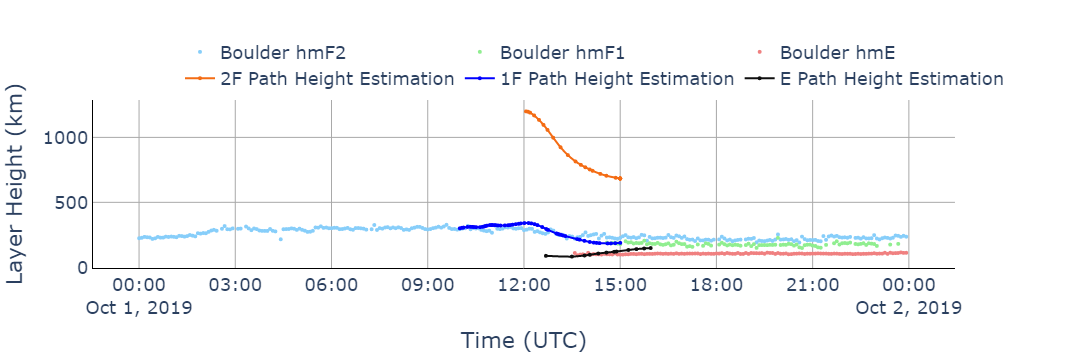

In [34]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
import numpy as np

N = 1
X = 1350 # dist from WWV to WA5FRF
h0_F2=300 #278
h0_E = 88.4
# calculate change in layer height:
deltaheight_F1 = (deltaheight(N=1, X = 1350, h0 = h0_F2, pathlen = pathlen_1F) + h0_F2)#
deltaheight_E = deltaheight(N=1, X = 1350, h0 = h0_E, pathlen = pathlen_E)+h0_E
deltaheight_F2 = deltaheight(N=2, X = 1350, h0 = h0_F2, pathlen = pathlen_2F)+h0_F2


fig.add_trace(
    go.Scatter(x=hmF2['Time'], y=hmF2['BOULDER'], 
               mode = 'markers', 
               marker=dict(
                    color='LightSkyBlue',
                    size=4,
                #     line=dict(
                #         color='MediumPurple',
                #         width=15
                # )
               ),
               # line_shape='spline',
               name="Boulder hmF2"),
    # secondary_y=True,
)

# fig.add_trace(
#     go.Scatter(x=hmF2['Time'], y=hmF2['BOULDER'].rolling(10).mean(), 
#                # mode = 'markers', 
#                line_shape='spline',
#                line_color = color_Boulder,
#                name="Boulder hmF2 Rolling Mean"),
#     secondary_y=True,
# )

 
fig.add_trace(
    go.Scatter(x=hmF1['Time'], y=hmF1['BOULDER'], 
               mode = 'markers', 
               marker=dict(
                    color='LightGreen',
                    size=4,
                #     line=dict(
                #         color='MediumPurple',
                #         width=15
                # )
               ),
               line_color = color_Boulder,
               name="Boulder hmF1"),
    # secondary_y=True, 
)


fig.add_trace(
    go.Scatter(x=hmE['Time'], y=hmE['BOULDER'], 
               mode = 'markers', 
               marker=dict(
                    color='LightCoral',
                    size=4,
                #     line=dict(
                #         color='MediumPurple',
                #         width=15
                # )
               ),
               name="Boulder hmE"),
    # secondary_y=True, 
)


fig.add_trace(
    go.Scatter(x=F2['Date'], y=deltaheight_F2, 
               mode = 'lines+markers',
               marker=dict(
                    size=4,
               ),
               line_shape='spline', 
               line_color = color_2F,
               name="2F Path Height Estimation"),
    # secondary_y=True
)

fig.add_trace(
    go.Scatter(x=F1['Date'], y=deltaheight_F1, 
               mode = 'lines+markers',
               marker=dict(
                    size=4,
               ),
               line_shape='spline', 
               line_color = color_1F,
               name="1F Path Height Estimation"),
    # secondary_y=True
)



fig.add_trace(
    go.Scatter(x=E['Date'], y=deltaheight_E, 
               mode = 'lines+markers',
               marker=dict(
                    size=4,
               ),
               line_shape='spline', 
               line_color = color_E,
               name="E Path Height Estimation"),
    # secondary_y=True
)

# Set x-axis title
fig.update_xaxes(title_text="Time (UTC)")

# Set y-axes titles
fig.update_yaxes(title_text="Layer Height (km)", secondary_y=False)

fontoptions(fig)


fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()
fig.write_html("plots/"+ "Ionosonde Comparison" + "_plot.html", include_plotlyjs="cdn")
# fig.write_image("plots/9d.png")




## Simulation Data

In [35]:
# Import data from raytrace simulation...
sim = pd.read_csv('data/WA5FRF 20 January IRI Raytrace.csv')
sim = sim.dropna()
sim
# df['Date']= datetime.datetime(2019, 10, 1, 0, 0, 0) + pd.to_timedelta(df['Time UTC'], 'hours')
# df.drop(['Time UTC'], axis = 1)

,Time,lat,lon,ground_range,group_range,phase_path,geometric_path_length,initial_elev,final_elev,apogee,...,TEC_path,Doppler_shift,Doppler_spread,FAI_backscatter_loss,frequency,nhops_attempted,ray_label,NRT_elapsed_time,Layer,Eclipse
0,2020-01-19T00:05,29.415642,261.160549,1370.667629,1395.455933,1392.100119,1393.763172,5.25,4.884787,94.553455,...,1.020000e+15,-0.006777,0.0,0.0,5.0,1.0,1.0,0.001,E,0.0
6,2020-01-19T00:05,29.448333,261.144976,1366.741614,1451.729553,1394.970452,1422.779972,14.75,14.079575,152.794936,...,1.690000e+16,-0.215257,0.0,0.0,5.0,1.0,1.0,0.002,F1,0.0
12,2020-01-19T00:10,29.512387,261.114429,1359.048341,1384.594471,1380.673410,1382.616828,5.50,5.126682,95.288752,...,1.200000e+15,-0.008936,0.0,0.0,5.0,1.0,1.0,0.008,E,0.0
18,2020-01-19T00:10,29.503476,261.118681,1360.118743,1442.657675,1392.419578,1417.067616,14.50,13.693784,156.049626,...,1.500000e+16,-0.193886,0.0,0.0,5.0,1.0,1.0,0.000,F1,0.0
24,2020-01-19T00:15,30.114761,260.825086,1286.654485,1321.364507,1308.863143,1315.043379,8.00,7.554920,100.316196,...,3.790000e+15,-0.042244,0.0,0.0,5.0,1.0,1.0,0.002,E,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2020-01-19T23:50,29.409377,261.163533,1371.420055,1471.155786,1385.691335,1427.287997,16.50,16.305073,143.460919,...,2.510000e+16,-0.278508,0.0,0.0,5.0,1.0,1.0,0.003,F2,0.0
1782,2020-01-19T23:55,29.319696,261.206195,1382.189014,1406.221554,1403.369115,1404.782949,5.00,4.647754,93.655310,...,8.758840e+14,-0.004845,0.0,0.0,5.0,1.0,1.0,0.002,E,0.0
1788,2020-01-19T23:55,29.452605,261.142940,1366.228629,1459.288673,1385.648405,1421.585882,15.75,15.406200,146.317369,...,2.180000e+16,-0.256503,0.0,0.0,5.0,1.0,1.0,0.003,F2,0.0
1794,2020-01-20T00:00,29.502353,261.119217,1360.253568,1384.705837,1381.615378,1383.146893,5.25,4.895689,94.115310,...,9.462470e+14,-0.005753,0.0,0.0,5.0,1.0,1.0,0.001,E,0.0
